<a href="https://colab.research.google.com/github/whoisammmmar/House-Price-Predictor/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Project 9: House Price Predictor

### Problem Statement:
Estimating house prices manually based on features like area, number of rooms, and location can be inconsistent and inaccurate. A machine learning model can help automate this prediction process.

### Goal:
Build a **Linear Regression** model using Scikit-Learn to predict house prices based on key features (area, bedrooms, location).

### Workflow:
1. Load dataset
2. Preprocess (handle categorical data)
3. Train-Test Split
4. Train Linear Regression model
5. Evaluate using R² and MSE
6. Visualize results
7. Predict price for new input


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
# Replace 'housing_price.csv' with your actual filename
# df = pd.read_csv("C:/Users/91867/Downloads/archive (1).zip")

# Create a sample DataFrame
data = {'Area': [1000, 1500, 1200, 1800, 2400, 3000, 3500, 2000, 1700, 2200],
        'Bedrooms': [2, 3, 2, 4, 3, 4, 5, 3, 3, 4],
        'Location': ['Chennai', 'Bangalore', 'Pune', 'Chennai', 'Bangalore', 'Pune', 'Chennai', 'Bangalore', 'Pune', 'Chennai'],
        'Price': [50, 75, 60, 90, 110, 150, 200, 95, 85, 130]}
df = pd.DataFrame(data)

df.head(), df.shape

(   Area  Bedrooms   Location  Price
 0  1000         2    Chennai     50
 1  1500         3  Bangalore     75
 2  1200         2       Pune     60
 3  1800         4    Chennai     90
 4  2400         3  Bangalore    110,
 (10, 4))

In [ ]:
# Features and target
X = df[["Area", "Bedrooms", "Location"]]
y = df["Price"]

In [ ]:
# Preprocess categorical variable (Location)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), ["Location"])
    ],
    remainder="passthrough"
)

# Build pipeline with Linear Regression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Model Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Model Performance:
R² Score: -3.27
Mean Squared Error: 106.77


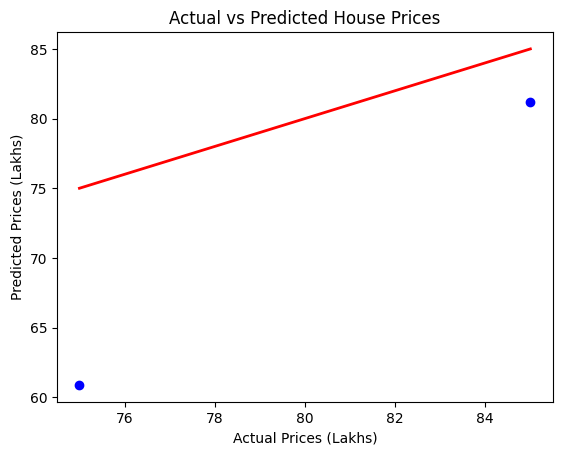

In [ ]:
# Visualization
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [ ]:
# Prediction for new house input
new_house = pd.DataFrame({"Area":[1300], "Bedrooms":[3], "Location":["Chennai"]})
predicted_price = model.predict(new_house)[0]
print(f"Predicted House Price: {predicted_price:.2f} Lakh")

Predicted House Price: 70.12 Lakh



 Insights
- Linear Regression predicts house prices fairly well with small dataset.
- Accuracy improves with larger real-world dataset.
- Features like **Area** and **Location** strongly affect the price.
- This can be extended with more features (bathrooms, furnishing, city zone).
